# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

Data sources:

profiles.csv was provided by Codecademy.com.

# Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

# Project goals

The primary objective of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. The specific research question that will be addressed is whether it's possible to predict an OkCupid user's signs using other variables from their profile. This project is significant and for sure is very difficult to approach to an convicend score in order to have a predictive model, but I can learn a lot trying to reach the target.

# Data

The project will use one dataset provided by Codecademy called profiles.csv. The data comprises user profiles, with each row representing an OkCupid user and the columns consisting of their responses to multi-choice and short answer questions.

# Analysis

To understand the distribution, count, and relationship between variables, descriptive statistics and data visualization will be used. Since the project's primary goal is to make predictions about users' astrological signs, supervised learning machine learning models' classification algorithms will be used.

# Evaluation

At the conclusion of the project, the machine learning model will be evaluated using a validation dataset. A confusion matrix and metrics such as accuracy, precision, recall, and F1 scores can be used to verify the predictions' output.

# Load and Check Data

Before proceeding with supervised learning, it is important to verify that the data has a label or response variable. Without a label or response variable, the data cannot be used for supervised learning, and an alternative approach may need to be considered. If the data is missing a crucial piece for analysis, it may be necessary to go back to the previous step and select a different problem to solve that has complete and relevant data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('profiles.csv')



# to know some...

# Data:

- age
- body_type
- diet
- drinks
- drugs
- education
- essay0 - My self-summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at…
- essay3 - The first thing people usually notice about me…
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about…
- essay7 - On a typical Friday night I am…
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…
- ethnicity
- height
- income
- job
- last_online
- location
- offspring - Regarding kids
- orientation - Working, studing?
- pets
- religion
- sex
- sign
- smokes
- speaks - Lenguages that speak
- status

In [3]:
print(df.count())
df.head()

age            59946
body_type      54650
diet           35551
drinks         56961
drugs          45866
education      53318
essay0         54458
essay1         52374
essay2         50308
essay3         48470
essay4         49409
essay5         49096
essay6         46175
essay7         47495
essay8         40721
essay9         47343
ethnicity      54266
height         59943
income         59946
job            51748
last_online    59946
location       59946
offspring      24385
orientation    59946
pets           40025
religion       39720
sex            59946
sign           48890
smokes         54434
speaks         59896
status         59946
dtype: int64


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [5]:
print(df.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


# I proceed to see which are the null values data on the DataFrame

I need to assess their importance of 'NaN' values in order to decide whether to delete the rows, convert them to strings, or/and use them for making predictions


In [6]:
print(f"Porcentaje %: \n \n{((df.isnull().sum())/len(df)).sort_values(ascending = False) * 100}")

Porcentaje %: 
 
offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
sex             0.000000
age             0.000000
orientation     0.000000
location        0.000000
last_online     0.000000
income          0.000000
status          0.000000
dtype: float64


# Now let's check the differents features in order to know more about them

## PETS

In [7]:
df.pets.value_counts()

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [8]:
like_dogs_and_cats = ['likes dogs and likes cats', 'likes dogs and has cats','has dogs and likes cats', 'has dogs and has cats']

# Aplicar la transformación
df['like_dogs_and_cats'] = df.pets.apply(lambda x: 'Likes_dogs_and_cats' 
                        if x in like_dogs_and_cats else 'None of those' if pd.notna(x)else np.nan)

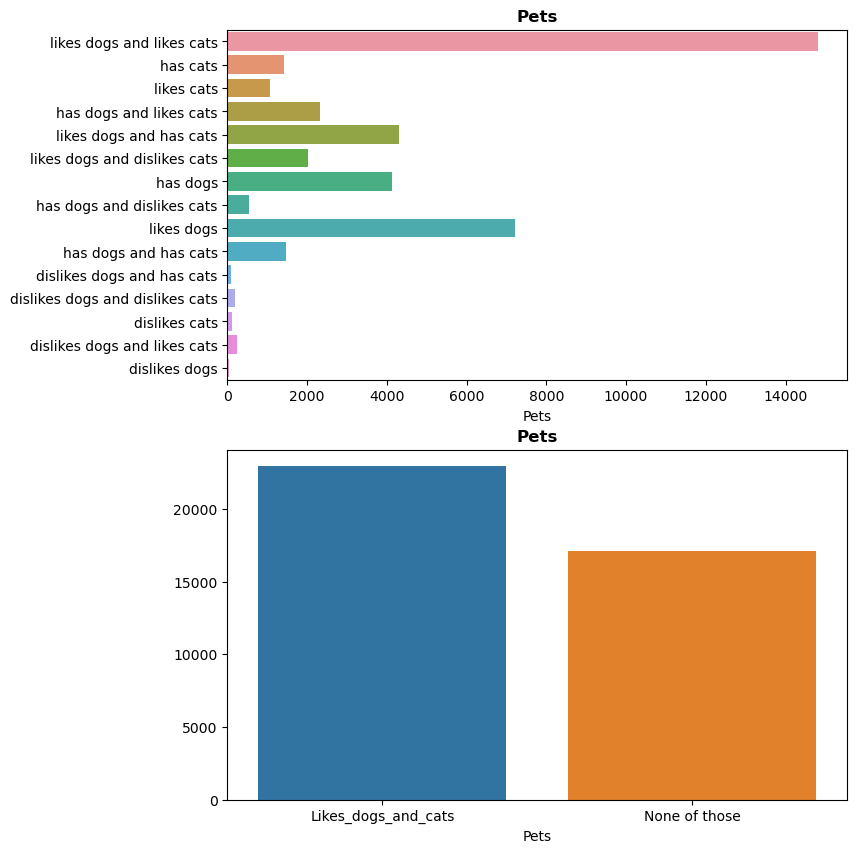

In [9]:
# bar plot

plt.figure(figsize=(8, 10))

plt.subplot(2,1,1)

sns.countplot(y='pets', data=df)
plt.title("Pets", fontweight='bold')
plt.xlabel("Pets")
plt.ylabel("")

plt.subplot(2,1,2)

sns.countplot(x='like_dogs_and_cats', data=df)
plt.title("Pets", fontweight='bold')
plt.xlabel("Pets")
plt.ylabel("")
plt.show()

## EDUCATION

In [10]:
df.education.value_counts(normalize = True)

education
graduated from college/university    0.449360
graduated from masters program       0.168067
working on college/university        0.107131
working on masters program           0.031565
graduated from two-year college      0.028715
graduated from high school           0.026783
graduated from ph.d program          0.023857
graduated from law school            0.021044
working on two-year college          0.020143
dropped out of college/university    0.018662
working on ph.d program              0.018437
college/university                   0.015023
graduated from space camp            0.012322
dropped out of space camp            0.009809
graduated from med school            0.008365
working on space camp                0.008346
working on law school                0.005045
two-year college                     0.004164
working on med school                0.003976
dropped out of two-year college      0.003582
dropped out of masters program       0.002626
masters program         

In [11]:
df['education_cleaned'] = df.education.apply(lambda x:x.split()[0] if pd.notna(x) else np.nan)


In [12]:
print(df.education_cleaned.value_counts())

education_cleaned
graduated             39376
working               10465
dropped                2108
college/university      801
two-year                222
masters                 136
high                     96
space                    58
ph.d                     26
law                      19
med                      11
Name: count, dtype: int64


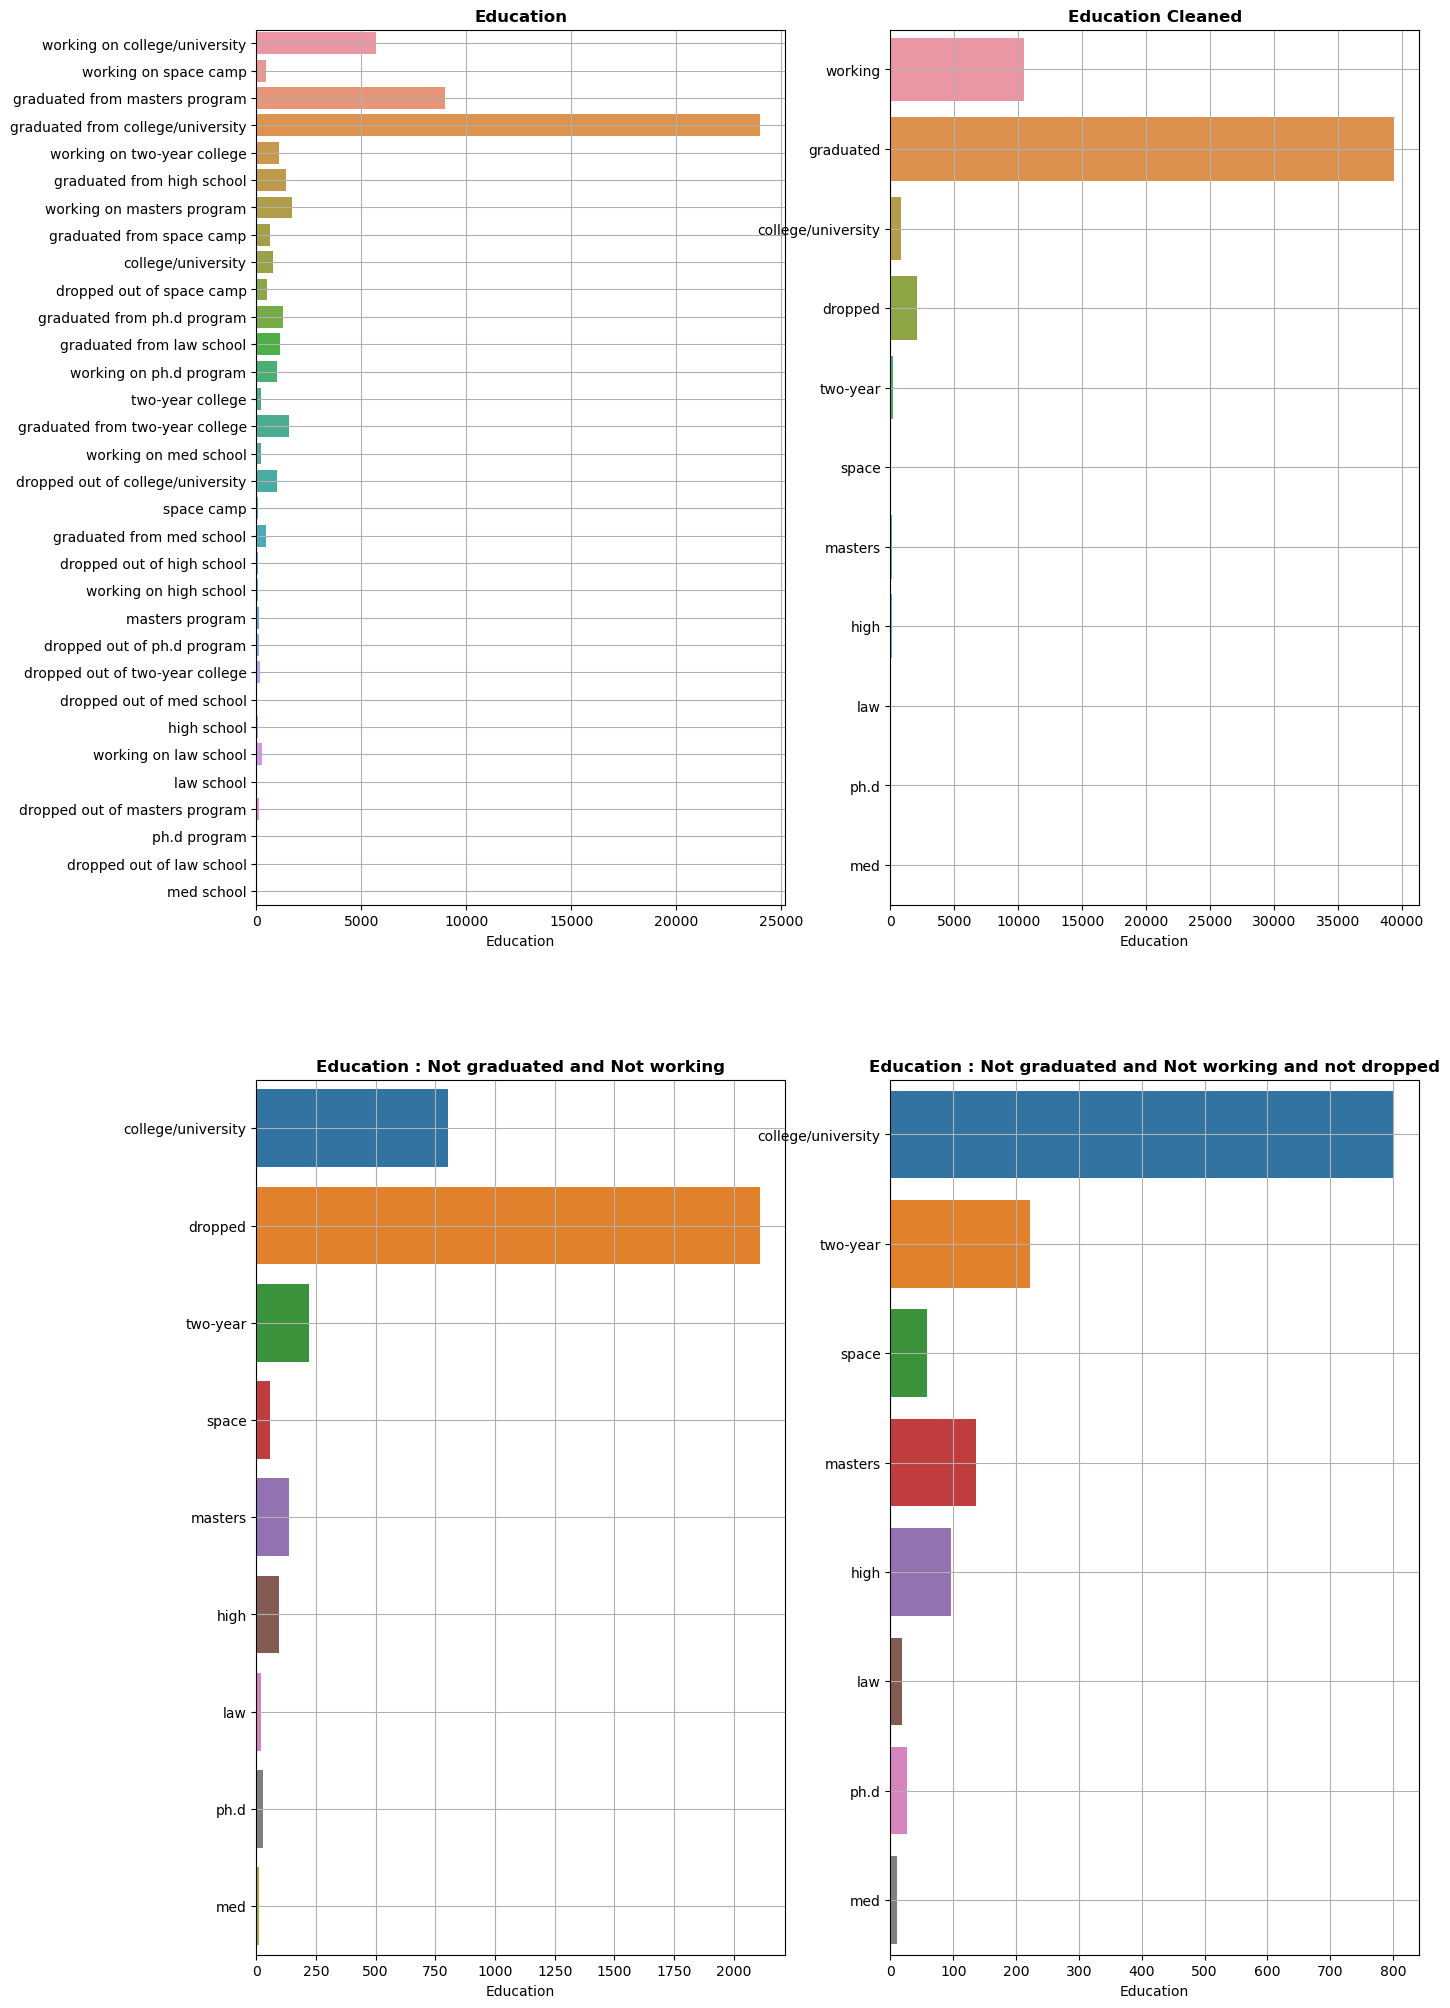

In [13]:
# bar plot
plt.figure(figsize =(15, 25))
plt.subplot(2,2,1)

sns.countplot(y='education', data=df)
plt.title("Education", fontweight='bold')
plt.xlabel("Education")
plt.ylabel("")
plt.grid(True)
plt.subplot(2,2,2)

sns.countplot(y='education_cleaned', data=df)
plt.title("Education Cleaned", fontweight='bold')
plt.xlabel("Education")
plt.ylabel("")
plt.grid(True)

plt.subplot(2,2,3)

df_filtered = df[~df.education_cleaned.isin(['working', 'graduated'])]

sns.countplot(y='education_cleaned', data=df_filtered)
plt.title("Education : Not graduated and Not working", fontweight='bold')
plt.xlabel("Education")
plt.ylabel("")
plt.grid(True)

plt.subplot(2,2,4)

df_filtered_again = df[~df.education_cleaned.isin(['working', 'graduated', 'dropped'])]

sns.countplot(y='education_cleaned', data=df_filtered_again)
plt.title("Education : Not graduated and Not working and not dropped", fontweight='bold')
plt.xlabel("Education")
plt.ylabel("")
plt.grid(True)
#plt.tight_layout()
plt.show()

## RELIGION

In [14]:
print(df.religion.value_counts())

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [15]:
df['religion_cleaned'] = df.religion.apply(lambda x: x.split()[0] if pd.notna(x) else np.nan)

In [16]:
print(df.religion_cleaned.value_counts())

religion_cleaned
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64


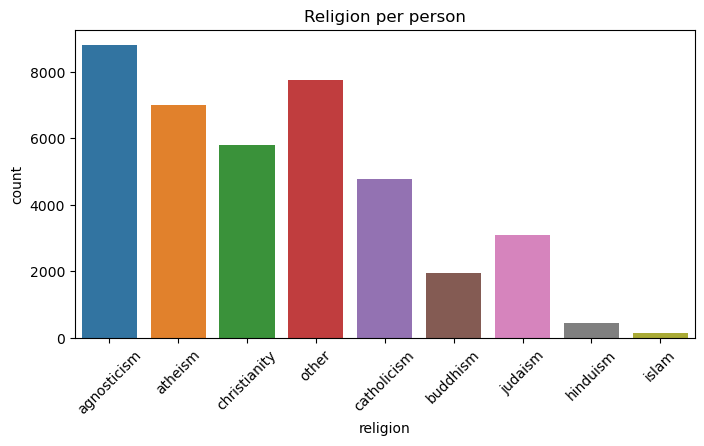

In [17]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'religion_cleaned', data = df )
plt.title("Religion per person")
plt.xlabel("religion")
plt.xticks(rotation = 45)
plt.show()

## SIGN

In [18]:
df.sign.value_counts()

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;

### We clean the data 'sign': we are going to separate the sign from the rest

In [19]:
df['sign_cleaned'] = df.sign.apply(lambda x: x.split()[0] if pd.notna(x) else np.nan)
df.sign_cleaned.value_counts()

sign_cleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

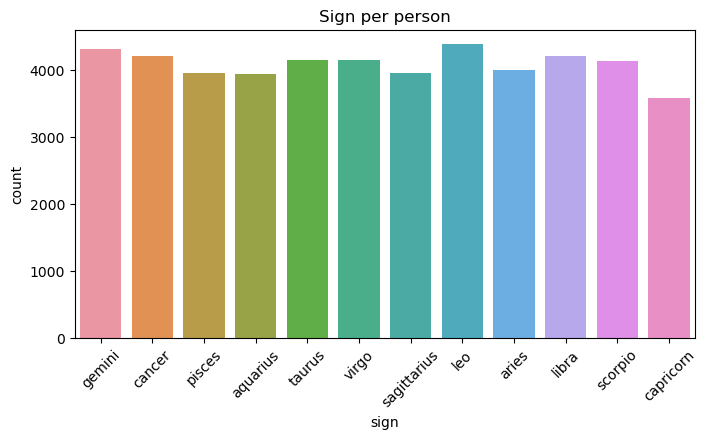

In [20]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'sign_cleaned', data = df )
plt.title("Sign per person")
plt.xlabel("sign")
plt.xticks(rotation = 45)
plt.show()

## SPEAKS

In [21]:
df.speaks.value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

In [22]:
df['number_languages'] = df.speaks.apply(lambda x: x.count(',') if pd.notna(x) else np.nan)
print(df.number_languages.value_counts())

number_languages
0.0    29072
1.0    17229
2.0     8682
3.0     3251
4.0     1662
Name: count, dtype: int64


In [23]:
languages_freq = df.speaks.value_counts()
top_languages = languages_freq.head(10)
print(top_languages.index)

Index(['english', 'english (fluently)', 'english (fluently), spanish (poorly)',
       'english (fluently), spanish (okay)',
       'english (fluently), spanish (fluently)', 'english, spanish',
       'english (fluently), french (poorly)', 'english, spanish (okay)',
       'english, spanish (poorly)', 'english (fluently), chinese (fluently)'],
      dtype='object', name='speaks')


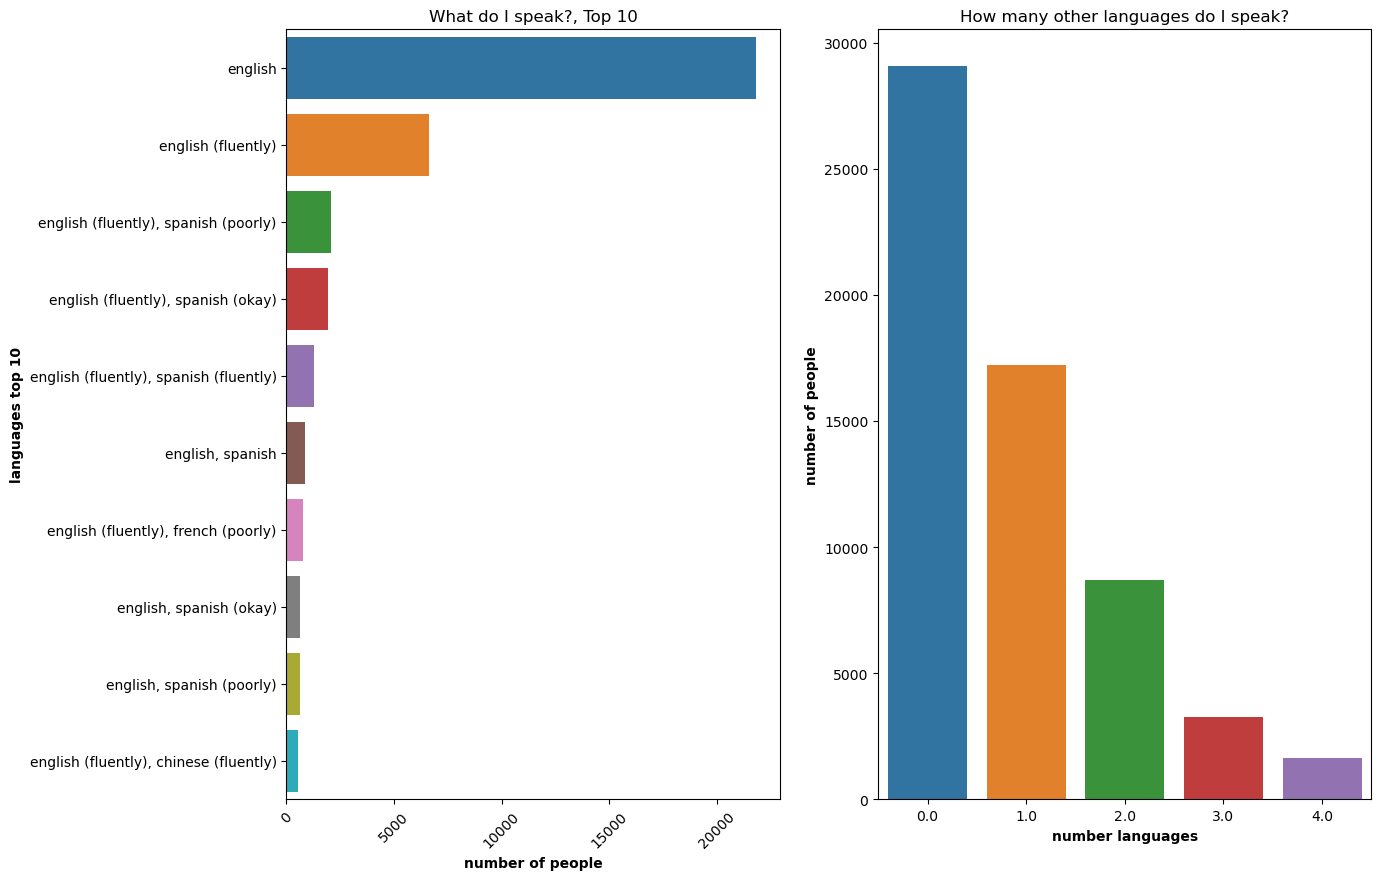

In [24]:
plt.figure(figsize = (14, 10))

plt.subplot(1,2,1)
sns.barplot(y = top_languages.index, x = top_languages.values )
plt.title('What do I speak?, Top 10')
plt.ylabel('languages top 10', fontweight = 'bold')
plt.xlabel('number of people', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(x = 'number_languages', data = df)
plt.title('How many other languages do I speak?')
plt.xlabel('number languages', fontweight = 'bold')
plt.ylabel('number of people', fontweight = 'bold')
plt.show()

## OFFSPRING

In [25]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

In [26]:
df['offspring'] = df.offspring.apply(lambda x: x.replace('&rsquo;','') if pd.notna(x) else np.nan)
has_kids = ['has kids', 'has a kid']

df['has_kids'] = df.offspring.apply(lambda x:'yes' if pd.notna(x) and any(string in x for string in has_kids) else 'no')

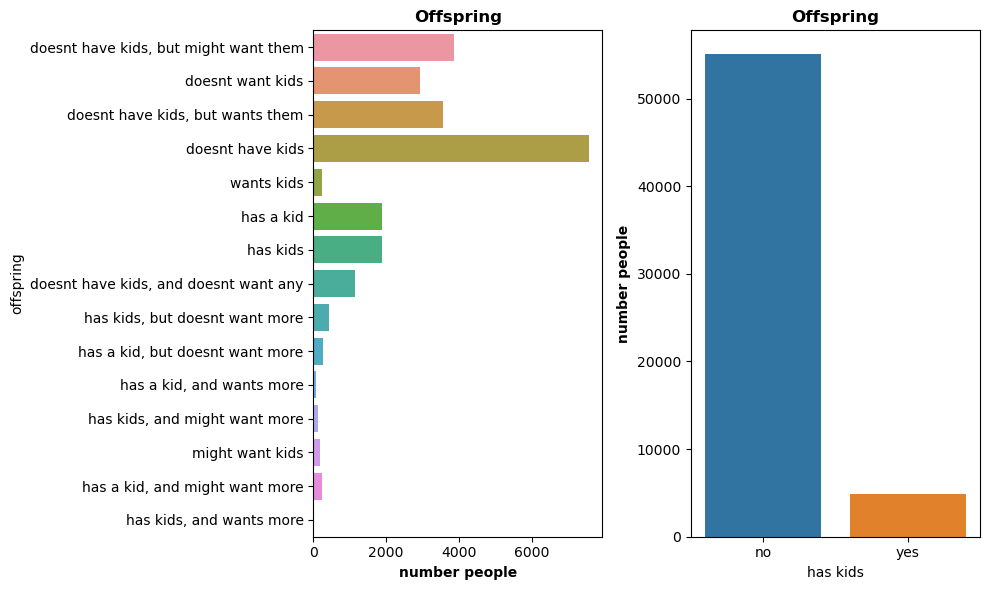

In [27]:
plt.figure(figsize = (10,6))
# First subplot
plt.subplot(1, 2, 1)
sns.countplot(y = 'offspring', data = df)
plt.title('Offspring', fontweight = 'bold')
plt.xlabel('number people', fontweight = 'bold')


# Second subplot

plt.subplot(1, 2, 2)
sns.countplot(x = 'has_kids', data = df)
plt.title('Offspring', fontweight = 'bold')
plt.xlabel('has kids')
plt.ylabel('number people', fontweight = 'bold')

plt.tight_layout()
plt.show()





## STATUS

In [28]:
print(df.status.value_counts())
single = df.status[df.status == 'single'].value_counts()

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


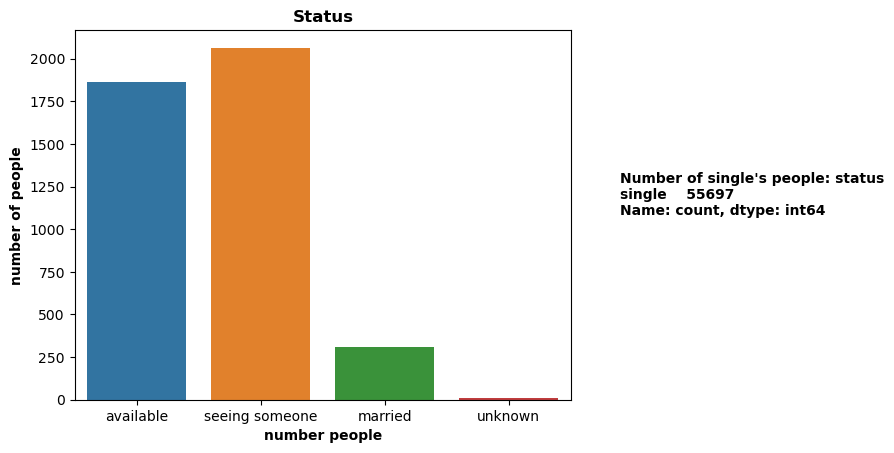

In [29]:
sns.countplot(x = df.status[df.status != 'single'], data = df)
plt.title('Status', fontweight = 'bold')
plt.xlabel('number people', fontweight = 'bold')
plt.text(x = 3.9, y = plt.ylim()[1] * 0.5 , s = f"Number of single's people: {single}", fontweight = 'bold')
plt.ylabel ("number of people", fontweight = 'bold')

#plt.text(x=3.9,
    #y=plt.ylim()[1] * 0.5,  s=f'Single = {single}',  fontsize=12, 
    #ha='center', 
    #va='top', 
    #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  
#)



plt.show()

## LOCATION

In [30]:
df.location.value_counts(normalize = True)

location
san francisco, california         0.518200
oakland, california               0.120342
berkeley, california              0.070263
san mateo, california             0.022203
palo alto, california             0.017749
                                    ...   
south wellfleet, massachusetts    0.000017
orange, california                0.000017
astoria, new york                 0.000017
london, united kingdom            0.000017
rochester, michigan               0.000017
Name: proportion, Length: 199, dtype: float64

In [31]:
location_percentage = df.location.value_counts(normalize = True) * 100
top_10_location = location_percentage.head(10)
print(top_10_location)

location
san francisco, california    51.819971
oakland, california          12.034164
berkeley, california          7.026324
san mateo, california         2.220332
palo alto, california         1.774931
alameda, california           1.518033
san rafael, california        1.259467
hayward, california           1.246122
emeryville, california        1.231108
redwood city, california      1.156040
Name: proportion, dtype: float64


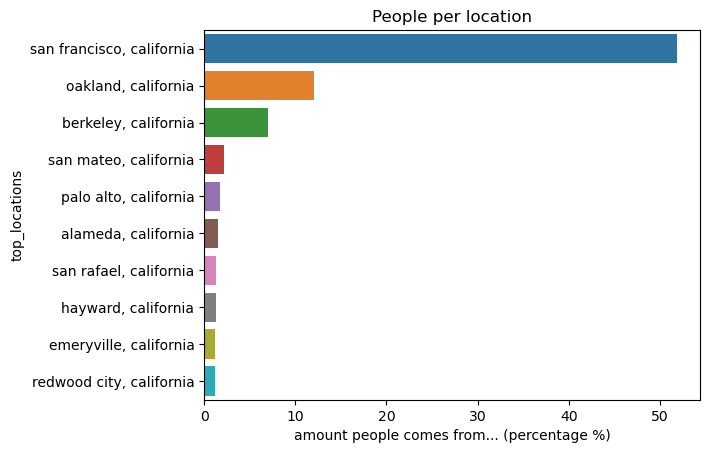

In [32]:

sns.barplot(y = top_10_location.index, x = top_10_location.values)
plt.title("People per location")
plt.ylabel(("top_locations"))
plt.xlabel("amount people comes from... (percentage %)")
plt.show()

## AGE

#### I am going to agrupate the age in order to visualize better the statistics

In [33]:
bins = [18, 25, 35, 45, 60, 120]
labels = ['18-25', '26-35', '36-45', '46-60', '61+']

df['age_category'] = pd.cut(df.age, bins, labels = labels, right = True)

#### In this case, for the third graphic I will use the IQR distribution for the age category

In [34]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filterQ =df[(df.age >= lower_bound) & (df.age <= upper_bound)]

### Lets see dfferents forms to visualize the age'distribution

Number people by sex: sex
m    35829
f    24117
Name: count, dtype: int64


Number people agrupated by age: age_category
26-35    28621
18-25    14145
36-45    10803
46-60     5102
61+        966
Name: count, dtype: int64


Number of people accoring the status:
status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64




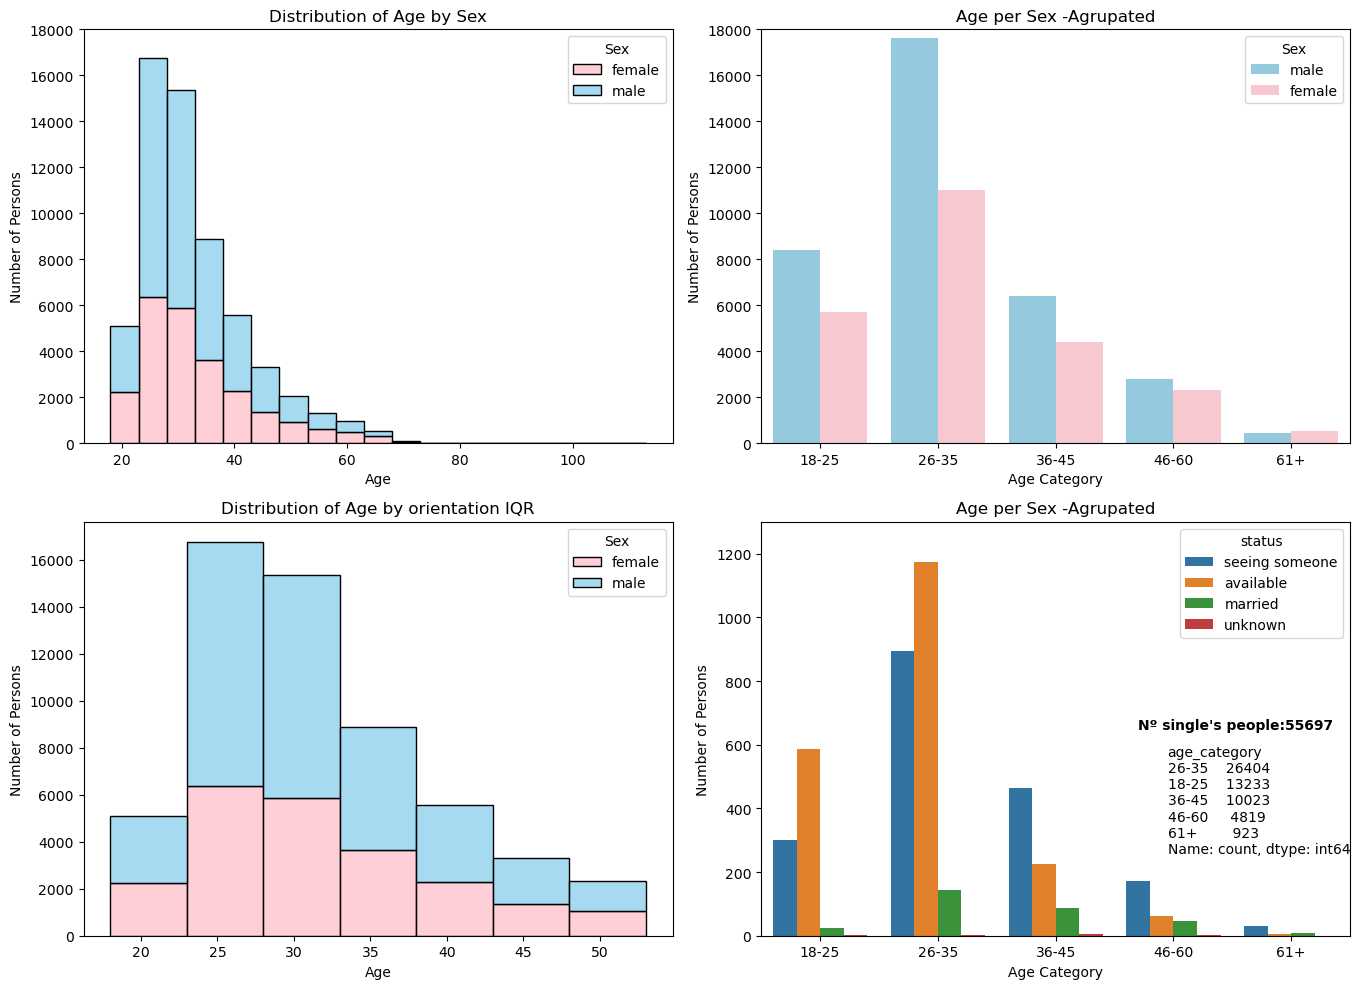

In [35]:
print(f"Number people by sex: {df.sex.value_counts()}\n\n")
print(f"Number people agrupated by age: {df.age_category.value_counts()}\n\n")
print(f"Number of people accoring the status:\n{df.status.value_counts()}\n\n")

plt.figure(figsize=(14, 10))

# Primer subgráfico
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette={'m': 'skyblue', 'f': 'pink'}, binwidth=5)

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by Sex')
plt.legend(title='Sex', labels=['female', 'male'])
plt.ylim(0,18000)

# Segundo subgráfico
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='age_category', hue='sex', palette={'m': 'skyblue', 'f': 'pink'})

plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.ylim(0,18000)
plt.title('Age per Sex -Agrupated')
plt.legend(title='Sex', labels=['male', 'female'])

# Tercer subgráfico IQR

plt.subplot(2, 2, 3)
sns.histplot(data=df_filterQ, x='age', hue='sex', multiple='stack', palette={'m': 'skyblue', 'f': 'pink'}, binwidth=5)

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by orientation IQR')
plt.legend(title='Sex', labels=['female', 'male'])

# Cuarto subgráfico

filtered_df_status = df[df['status'].isin(['seeing someone', 'available','married','unknown'])]
plt.subplot(2, 2, 4)
sns.countplot(data=filtered_df_status, x='age_category', hue='status')

plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.ylim(0,1300)
plt.title('Age per Sex -Agrupated')

single = df.status[df.status == 'single'].value_counts()[0]
labels = ['seeing someone', 'available','married','unknown']

plt.legend(title='status', labels= labels)
plt.text(x = 2.7, y = plt.ylim()[1] * 0.5 , s = f"Nº single's people:{single}", fontweight = 'bold')
plt.text(x = 2.95, y = plt.ylim()[1] * 0.2 , s = f"{df[df.status == 'single'].age_category.value_counts()}")

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## ORIENTATION

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64





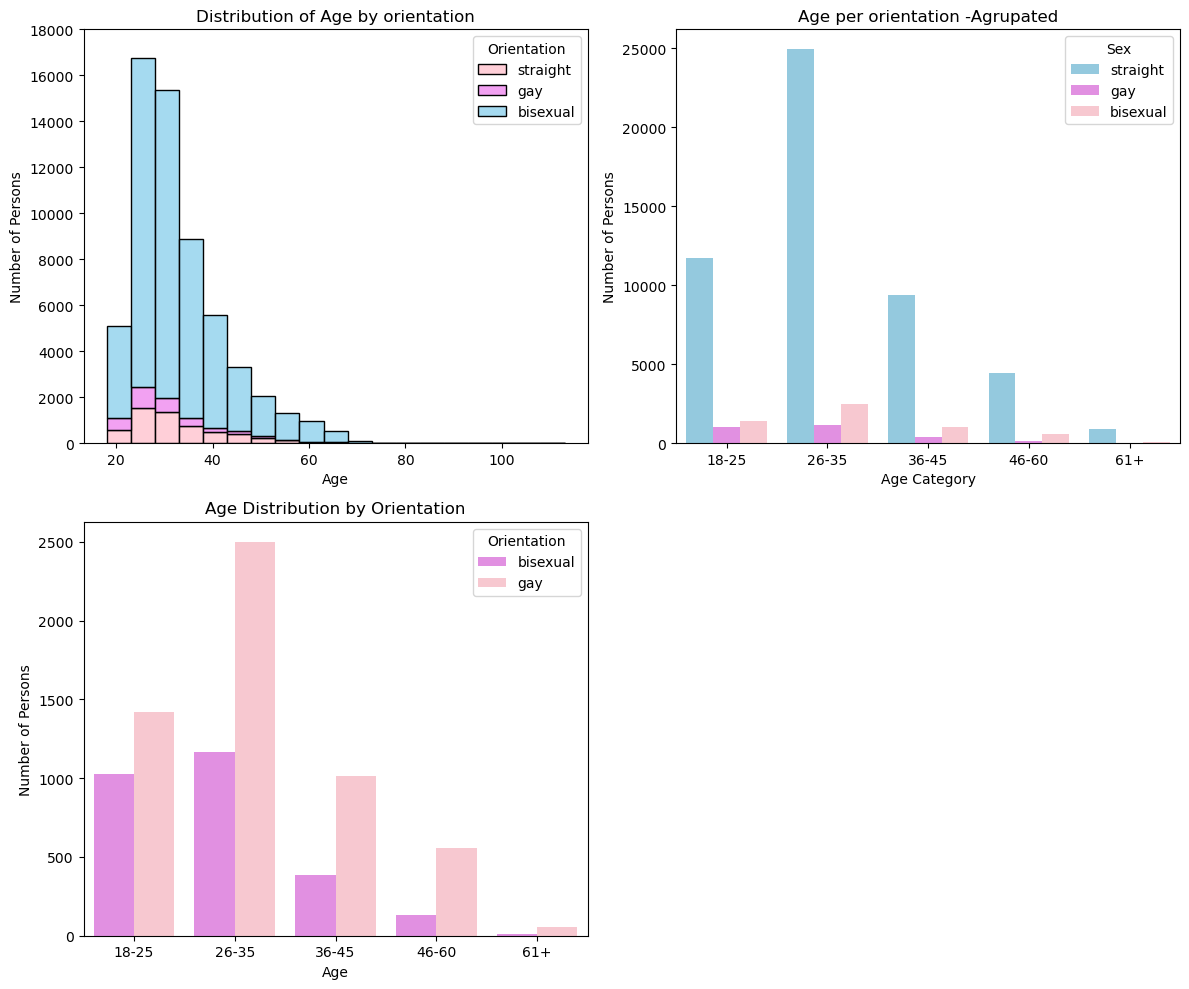

In [36]:
print(f"{df.orientation.value_counts()}\n\n\n")
plt.figure(figsize=(12, 10))

# Primer subgráfico
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='orientation', multiple='stack', palette={'straight': 'skyblue', 'gay': 'pink', 'bisexual': 'violet'}, binwidth=5)
plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by orientation')
plt.legend(title='Orientation', labels=['straight', 'gay', 'bisexual'])
plt.ylim(0,18000)

# Segundo subgráfico

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='age_category', hue='orientation', palette={'straight': 'skyblue', 'gay': 'pink', 'bisexual': 'violet'})
plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.title('Age per orientation -Agrupated')
plt.legend(title='Sex', labels=['straight', 'gay', 'bisexual'])

# Tercer subgráfico

filtered_df = df[df['orientation'].isin(['gay', 'bisexual'])]

plt.subplot(2, 2, 3)
sns.countplot(data=filtered_df, x='age_category', hue='orientation', palette={'gay': 'pink', 'bisexual': 'violet'})

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Age Distribution by Orientation')
plt.legend(title='Orientation')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## INCOME

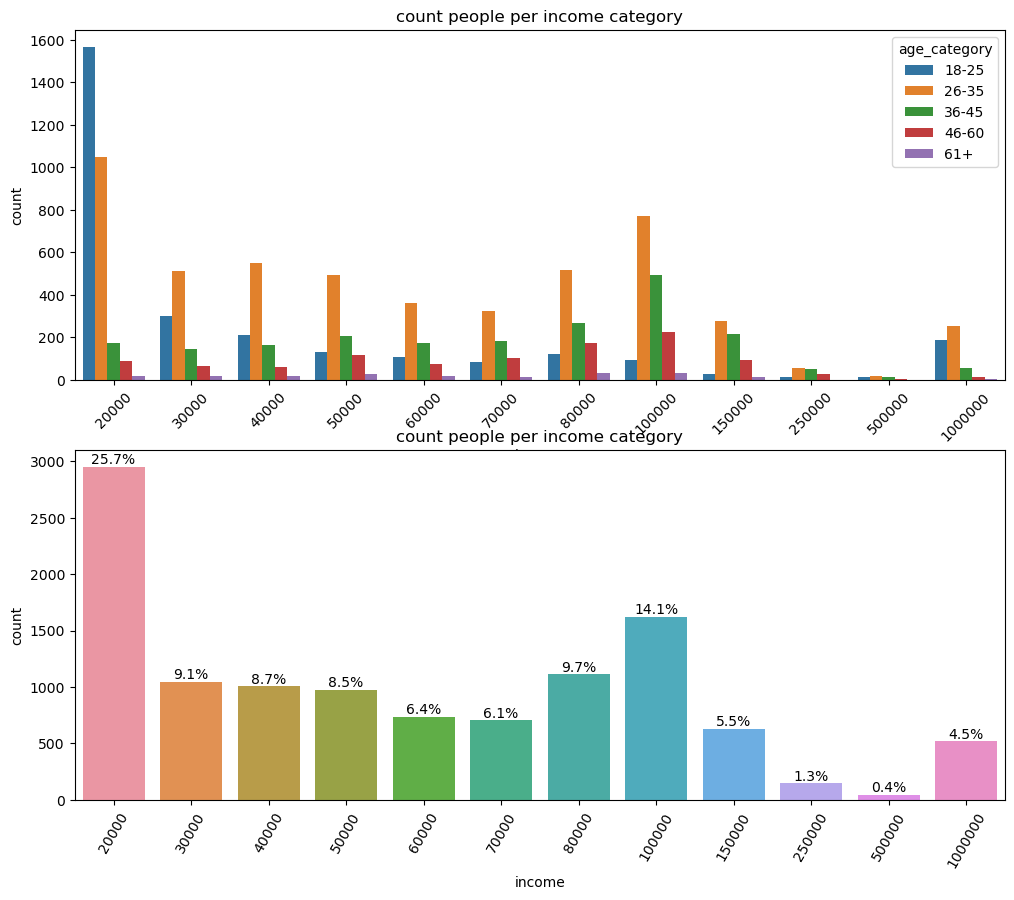

In [37]:
plt.figure(figsize = (12,10))
# First graphic

plt.subplot(2, 1, 1)


income_filter = df[df.income != -1]
sns.countplot(data=income_filter, x='income', hue = 'age_category')
plt.xticks(rotation = 45)
plt.title('count people per income category')

# Second graphic

plt.subplot(2, 1, 2)
total = len(income_filter)
ax = sns.countplot(data=income_filter, x='income')

for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / total) * 100
    ax.text(
        patch.get_x() + patch.get_width() / 2, 
        height, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom'
    )
  
plt.xticks(rotation = 60)
plt.title('count people per income category')

plt.show()


## DRUGS

In [38]:
df.drugs.value_counts()

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

I resume the feature 'drugs' between Yes or not drug consumtion

In [39]:
df['drugs_cleaned'] = df.drugs.apply(lambda x: 'no' if x == 'never' else 'yes' if pd.notna(x) else np.nan)
df.drugs_cleaned.value_counts()

drugs_cleaned
no     37724
yes     8142
Name: count, dtype: int64

In [40]:
df.religion_cleaned.value_counts()

religion_cleaned
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64

# TEST #

### ¿Is there any significant difference between those who has kids and those who doesn't with the income?

In [41]:
from scipy.stats import ttest_ind

income_has_kids = df.income[(df.has_kids == 'yes') & (df.income != 0)]
income_no_kids = df.income[(df.has_kids == 'no') & (df.income != 0)]
t_stat, pval = ttest_ind(a = income_has_kids, b = income_no_kids, alternative = 'less', equal_var = False )
print(pval)

0.9993409872306867


This very low p-value indicates that there is a statistically significant difference between the incomes of the two groups compared. The statistical significance suggests that it is unlikely that the observed difference in income occurred by random chance. This implies a meaningful relationship between having children and income levels.

### I am curious: I want to know if is there any significant difference among genders with drugs consumption

In [42]:
from scipy.stats import chi2_contingency

# separate the men and women
men_df = df[df.sex == 'm'].dropna(subset='drugs')
fem_df = df[df.sex == 'f'].dropna(subset='drugs')

# determine the size of the smaller group
n = len(fem_df)

# randomly select a subset of the men
men_df = men_df.sample(n=n, random_state=42)

# concatenate the men and women back together
balanced = pd.concat([men_df, fem_df])

cross = pd.crosstab(balanced.sex, balanced.drugs)
print(f"\033[1mConsumption of drugs among gender in percentage %:\n\n {round(cross/n * 100, 2)}\033[0m")

Consumption of drugs among gender in percentage %:

 drugs  never  often  sometimes
sex                           
f      84.86   0.69      14.45
m      80.57   1.00      18.43


### Is there a significant difference in drug consumption between genders?


In [43]:
# chi-squared test on the balanced data
chi2, pval, dof, expected = chi2_contingency(cross)
print(f"\033[1mpval, Less than 0,05 means a significant difference: {pval}\033[0m")

pval, Less than 0,05 means a significant difference: 3.3712616665113124e-27


We can assume that there is a significant difference in drug consumption between genders, with men having a higher rate of drug use

The extremely low p-value (3.37e-27) indicates that there is a statistically significant difference in drug consumption patterns between men and women. This means that the distribution of drug use between men and women is not the same.

### Preparing data for the target 'religion', I want to know if there is a significant difference between categorical features, so I can use them to predict

In [44]:
df.religion_cleaned.value_counts()

religion_cleaned
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64

In [45]:
contingency = pd.crosstab(df.religion_cleaned[df.religion_cleaned != 'christianity'], df.drugs)

print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
print(f"\nThe test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,\n\n pval = {pval}" )


drugs             never  often  sometimes
religion_cleaned                         
agnosticism        4995     45       1499
atheism            3519     87       1537
buddhism           1211     15        297
catholicism        3773     20        310
hinduism            363      7         26
islam               101      7         18
judaism            1857     12        384
other              4486     85       1461

The test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,

 pval = 8.38154348939159e-186


In [46]:
df_sign = df.dropna(subset = ['sign', 'religion_cleaned'])
#df_relig = df_drugs[df_drugs.religion_cleaned.isin(['agnosticism', 'atheism', 'catholicism', '' ])]


contingency = pd.crosstab(df_sign.religion_cleaned, df_sign.sign_cleaned)

print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
print(f"\nThe test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,\n\n pval = {pval}" )


sign_cleaned      aquarius  aries  cancer  capricorn  gemini  leo  libra  \
religion_cleaned                                                           
agnosticism            602    618     692        526     679  729    640   
atheism                450    459     492        387     493  463    436   
buddhism               145    134     160        137     136  162    166   
catholicism            338    346     401        347     421  383    369   
christianity           374    428     392        418     476  437    425   
hinduism                28     23      30         31      34   33     33   
islam                    9      9       9         11      14   17     11   
judaism                220    242     214        188     232  245    214   
other                  599    587     593        517     665  650    676   

sign_cleaned      pisces  sagittarius  scorpio  taurus  virgo  
religion_cleaned                                               
agnosticism          599          6

In [47]:
df_orientation = df.dropna(subset = ['orientation', 'religion_cleaned'])
#df_relig = df_drugs[df_drugs.religion_cleaned.isin(['agnosticism', 'atheism', 'catholicism', '' ])]


contingency = pd.crosstab(df_sign.religion_cleaned, df_orientation.orientation)

print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
print(f"\nThe test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,\n\n pval = {pval}" )


orientation       bisexual  gay  straight
religion_cleaned                         
agnosticism            402  729      6569
atheism                419  563      4520
buddhism               123  260      1387
catholicism             72  404      3932
christianity           125  375      4537
hinduism                 8   25       367
islam                    4    8       111
judaism                116  213      2304
other                  587  799      5801

The test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,

 pval = 8.106907422780958e-104


In [48]:
df_drinks = df.dropna(subset = ['drinks', 'religion_cleaned'])
#df_relig = df_drugs[df_drugs.religion_cleaned.isin(['agnosticism', 'atheism', 'catholicism', '' ])]


contingency = pd.crosstab(df_drinks.religion_cleaned, df_drinks.orientation)

print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
print(f"\nThe test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,\n\n pval = {pval}" )



orientation       bisexual  gay  straight
religion_cleaned                         
agnosticism            433  762      7410
atheism                490  649      5664
buddhism               127  267      1487
catholicism             78  409      4185
christianity           132  387      5139
hinduism                 9   24       403
islam                    4    9       111
judaism                125  228      2660
other                  606  802      6129

The test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,

 pval = 2.3911101908756573e-113


In [49]:
df.job.value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [50]:
df_job = df.dropna(subset = ['job', 'religion_cleaned'])
#df_relig = df_drugs[df_drugs.religion_cleaned.isin(['agnosticism', 'atheism', 'catholicism', '' ])]


contingency = pd.crosstab(df_job.religion_cleaned, df_job.job)

print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
print(f"\nThe test chi2 square indicate that we must cosider hyphotesis alternative, the result of pval is less than 0.05,\n\n pval = {pval}" )


job               artistic / musical / writer  \
religion_cleaned                                
agnosticism                               740   
atheism                                   563   
buddhism                                  223   
catholicism                               193   
christianity                              264   
hinduism                                   20   
islam                                       7   
judaism                                   207   
other                                     951   

job               banking / financial / real estate  \
religion_cleaned                                      
agnosticism                                     262   
atheism                                         146   
buddhism                                         63   
catholicism                                     262   
christianity                                    325   
hinduism                                         30   
islam               

# Now we are going to clean data eliminating null data

In [51]:
df.shape

(59946, 39)

#### Now, we are going to select our features and drop all 'nan' values:

In [52]:
columns = [ 'orientation', 'drinks', 'job', 'drugs', 'religion_cleaned']

# clean all null data
df_clean = df[columns].dropna(subset = columns).reset_index(drop = True)
df_clean.shape


(28651, 5)

### Encoding features

It's necesary to transform in numbers all categorical features and target in order to prepare the data for the model and help the model to work with less effort.

In [53]:
le = LabelEncoder()

for col in columns:
    df_clean[col] = le.fit_transform(df_clean[col])


Is the data target unbalance?, we'll see that are enough balanced

# Preparing the model

In [54]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28651 entries, 0 to 28650
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   orientation       28651 non-null  int64
 1   drinks            28651 non-null  int64
 2   job               28651 non-null  int64
 3   drugs             28651 non-null  int64
 4   religion_cleaned  28651 non-null  int64
dtypes: int64(5)
memory usage: 1.1 MB
None


# We are going to select features, target and prepare train data

In [55]:
# X are the features (we exclude the target)  and y is the target
X = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)


# turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


# DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)

DecisionTreeClassifier()

We try with the model: Decision Tree Classifer, 

In [69]:
from sklearn.metrics import classification_report


print("Score with DecisionTreeClassifier: ", tree_class.score(X_train, y_train))
y_pred= tree_class.predict(X_test)
classification_report_str = classification_report(y_test, y_pred, zero_division = 1)

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report_str)

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Score with DecisionTreeClassifier:  0.2912788533134773
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.32      0.29      1496
           1       0.29      0.22      0.25      1138
           2       0.08      0.00      0.01       349
           3       0.19      0.09      0.12       964
           4       0.24      0.47      0.32      1189
           5       0.00      0.00      1.00        76
           6       1.00      0.00      0.00        26
           7       0.17      0.00      0.00       534
           8       0.32      0.37      0.34      1391

    accuracy                           0.27      7163
   macro avg       0.28      0.17      0.26      7163
weighted avg       0.25      0.27      0.25      7163

Confusion Matrix:
 [[485 227   2  89 394   1   0   0 298]
 [343 254   4  48 255   0   0   0 234]
 [ 84  38   1  28  92   0   0   4 102]
 [239  67   0  88 421   0   0   0 149]
 [246  75   0  89 563   0   0   0 216]
 [

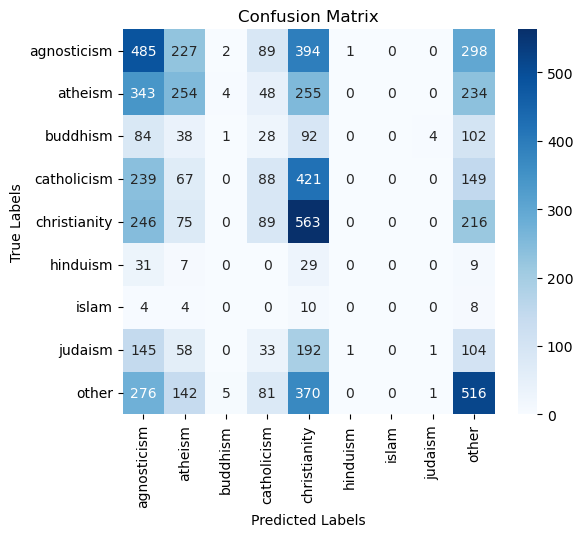

In [70]:
# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, fmt='d',annot=True, cmap='Blues', cbar=True, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()


# Train a Random Forest Classifier

Models like Random Forests, have more hyperparameters that can be fine-tuned compared to a simple Decision Tree.

This allows these models to be more flexible and achieve better predictive performance on a wider range of datasets. Decision Trees are often used as a baseline model because they are easy to understand, but they can be prone to overfitting and may not capture complex patterns as well as more sophisticated models.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# train a Random Forest classifier
rf = RandomForestClassifier()

params = {'max_depth': list(range(1, 11)),
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(rf, params, scoring='accuracy', cv=5, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

## We'll find the better hyperparameters to incorporate on the model

In [60]:
# make predictions on test set
y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

print(clf.best_params_)
print(clf.best_score_)

0.26916096607566664
              precision    recall  f1-score   support

           0       0.28      0.30      0.29      1496
           1       0.32      0.20      0.25      1138
           2       1.00      0.00      0.00       349
           3       0.08      0.00      0.00       964
           4       0.23      0.59      0.33      1189
           5       1.00      0.00      0.00        76
           6       1.00      0.00      0.00        26
           7       1.00      0.00      0.00       534
           8       0.31      0.40      0.35      1391

    accuracy                           0.27      7163
   macro avg       0.58      0.17      0.14      7163
weighted avg       0.36      0.27      0.22      7163

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.260517445211865


### We use the better hyperparameters on the  model to improve the prediction

In [61]:
rf = RandomForestClassifier(n_estimators=150, max_depth=9, min_samples_leaf=4, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, n_estimators=150,
                       random_state=42)

In [62]:
# make predictions on test set
y_pred = rf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

0.26692726511238307
              precision    recall  f1-score   support

           0       0.28      0.29      0.28      1496
           1       0.30      0.21      0.25      1138
           2       1.00      0.00      0.00       349
           3       0.24      0.02      0.04       964
           4       0.23      0.57      0.32      1189
           5       1.00      0.00      0.00        76
           6       1.00      0.00      0.00        26
           7       1.00      0.00      0.00       534
           8       0.31      0.40      0.35      1391

    accuracy                           0.27      7163
   macro avg       0.60      0.16      0.14      7163
weighted avg       0.37      0.27      0.22      7163



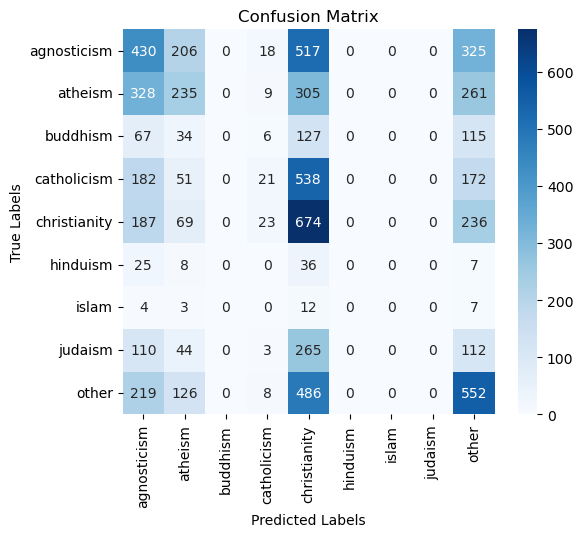

In [63]:
cm = confusion_matrix(y_test, y_pred)

# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()

# MODEL KNN

In [64]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:

from sklearn.neighbors import KNeighborsClassifier


# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_neighbors': [3, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print("Accuracy with optimized parameters: ", accuracy_score(y_test, y_pred))


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy with optimized parameters:  0.22811671087533156


In [72]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='uniform')
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

 ### A basic confusion matrix, visualizing the model KNN on a matrix form:

In [73]:


# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[489 363  12 195 223   0   0   3 211]
 [423 284   8 119 137   0   0   4 163]
 [111  57   6  54  46   0   0   3  72]
 [223 159   9 262 193   0   0   0 118]
 [283 174  12 284 270   0   0   2 164]
 [ 25  18   1  15  13   0   0   0   4]
 [  8   4   0   4   6   0   0   0   4]
 [161 104   9  96 102   0   0   1  61]
 [385 264  28 196 194   0   0   2 322]]


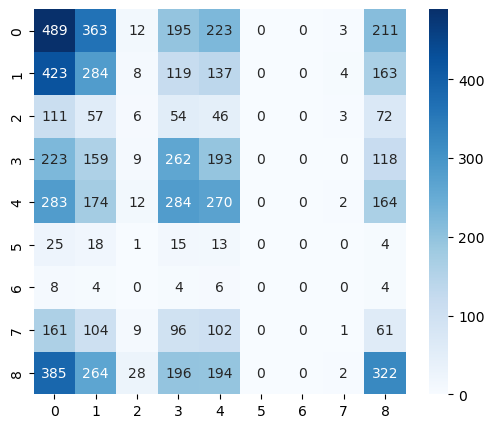

In [74]:
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = True )
plt.show()